# Kenya's Population Analysis

## 1. Data Loading and Cleaning

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Setting plotting style
plt.style.use('ggplot')

In [3]:
# Loading data
data = pd.read_excel("../PRODIGY_DS_01/Data/P_Data_Extract_From_World_Development_Indicators.xlsx", sheet_name='Data', nrows=50)  # Limiting rows due to footers in document

data.head()

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],Population growth (annual %) [SP.POP.GROW],"Population, female [SP.POP.TOTL.FE.IN]","Population, male [SP.POP.TOTL.MA.IN]",Rural population [SP.RUR.TOTL],Urban population [SP.URB.TOTL],"Population, total [SP.POP.TOTL]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],GDP (current LCU) [NY.GDP.MKTP.CN]
0,Kenya,KEN,1973,YR1973,118.436201,3.488745,6452684,6307721,11254039,1506366,12760405,..,1.756600e+10
1,Kenya,KEN,1974,YR1974,118.575838,3.416893,6676963,6526985,11573393,1630556,13203949,..,2.121400e+10
2,Kenya,KEN,1975,YR1975,118.718957,3.336334,6902776,6749132,11888901,1763007,13651908,..,2.393400e+10
3,Kenya,KEN,1976,YR1976,118.871546,3.245634,7129546,6972722,12198039,1904229,14102268,..,2.907200e+10
4,Kenya,KEN,1977,YR1977,118.703614,3.313304,7369217,7208130,12520191,2057155,14577346,..,3.719800e+10


Outrightly, there are missing values in the data. These missing values will be filled with 0 because using other values can be misleading, especially in the visualizations.

In [4]:
# checking the data characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country Name                                                       50 non-null     object 
 1   Country Code                                                       50 non-null     object 
 2   Time                                                               50 non-null     int64  
 3   Time Code                                                          50 non-null     object 
 4   Age dependency ratio (% of working-age population) [SP.POP.DPND]   50 non-null     float64
 5   Population growth (annual %) [SP.POP.GROW]                         50 non-null     float64
 6   Population, female [SP.POP.TOTL.FE.IN]                             50 non-null     int64  
 7   Population, male [SP.POP.TOT

However, according to the records there are no missing values.

In [5]:
# Inspecting the missing values
data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'].value_counts().iloc[:5]

Individuals using the Internet (% of population) [IT.NET.USER.ZS]
..             18
0               5
5.2             1
25.53293999     1
22.66877336     1
Name: count, dtype: int64

Missing values are represented by two fullstops (..). In this case filling missing values can be considered as replacing values.

In [6]:
# Filling missing values
data.replace({'..': 0}, inplace=True)

# Convering internet column to float type
data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'] = data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'].astype('float')

# Dropping unwanted columns
data.drop(['Country Name', 'Country Code', 'Time Code'], axis=1, inplace=True)

In [7]:
data.head()

,Time,Age dependency ratio (% of working-age population) [SP.POP.DPND],Population growth (annual %) [SP.POP.GROW],"Population, female [SP.POP.TOTL.FE.IN]","Population, male [SP.POP.TOTL.MA.IN]",Rural population [SP.RUR.TOTL],Urban population [SP.URB.TOTL],"Population, total [SP.POP.TOTL]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],GDP (current LCU) [NY.GDP.MKTP.CN]
0,1973,118.436201,3.488745,6452684,6307721,11254039,1506366,12760405,0.0,1.756600e+10
1,1974,118.575838,3.416893,6676963,6526985,11573393,1630556,13203949,0.0,2.121400e+10
2,1975,118.718957,3.336334,6902776,6749132,11888901,1763007,13651908,0.0,2.393400e+10
3,1976,118.871546,3.245634,7129546,6972722,12198039,1904229,14102268,0.0,2.907200e+10
4,1977,118.703614,3.313304,7369217,7208130,12520191,2057155,14577346,0.0,3.719800e+10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               50 non-null     int64  
 1   Age dependency ratio (% of working-age population) [SP.POP.DPND]   50 non-null     float64
 2   Population growth (annual %) [SP.POP.GROW]                         50 non-null     float64
 3   Population, female [SP.POP.TOTL.FE.IN]                             50 non-null     int64  
 4   Population, male [SP.POP.TOTL.MA.IN]                               50 non-null     int64  
 5   Rural population [SP.RUR.TOTL]                                     50 non-null     int64  
 6   Urban population [SP.URB.TOTL]                                     50 non-null     int64  
 7   Population, total [SP.POP.TO

The data is ready for analysis.

## 2. Exploratory Analysis

With this data we can answer questions such as:

1. What is the trend of age dependency ratio? 
2. What is the trend of internet access by the population?
3. What is the trend of real GDP? 
4. What is the trend of population growth rate?
5. What is the trend of total population?
6. What is the gender composition of the population?
7. What is the rural-urban composition of the population?
8. What sort of correlations are there between these aspects of Kenya's population?


### 2.1. Trend of Age Dependency Ratio

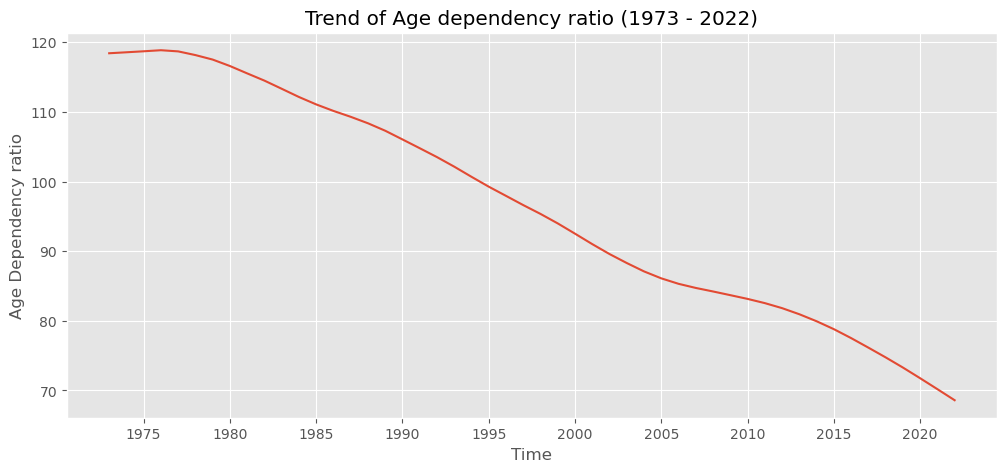

In [9]:
# Line plot showing the trend of Age dependency ratio
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Age dependency ratio (% of working-age population) [SP.POP.DPND]', x='Time')
plt.title("Trend of Age dependency ratio (1973 - 2022)")
plt.ylabel("Age Dependency ratio")

years = range(1975, 2025, 5)  # Setting the xticks variable
plt.xticks(years)
plt.show()

The age dependency ratio of Kenya drops over time. This is good as it signifies that the productive population has increased over time this should have led to an increase in total production of the country. 

### 2.2. Trend of the proportion of the population with access to Internet

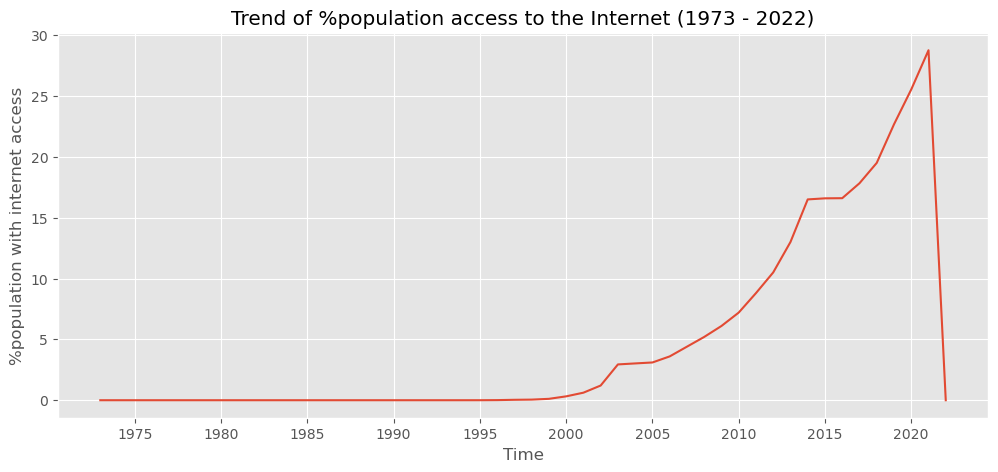

In [10]:
# Line plot showing the trend of the % population with access to the internet
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Individuals using the Internet (% of population) [IT.NET.USER.ZS]', x='Time')
plt.title("Trend of %population access to the Internet (1973 - 2022)")
plt.ylabel("%population with internet access")
# plt.ylim(bottom=0.000727482)  # Limiting to the minimum value before filling missing values
plt.xticks(years)
plt.show()


2022's value was arbitrarily filled with 0, therefore the drop shouldn't be there in the graph.

### 2.3. Trend of real GDP

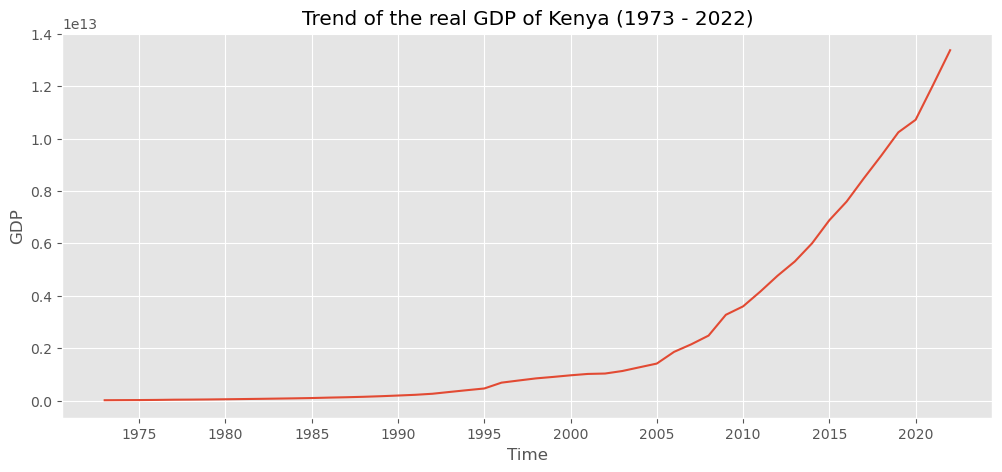

In [11]:
# Line plot showing the trend of real(current) GDP
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='GDP (current LCU) [NY.GDP.MKTP.CN]', x='Time')
plt.title("Trend of the real GDP of Kenya (1973 - 2022)")
plt.ylabel("GDP")
plt.xticks(years)
plt.show()

The GDP increases over time. At about 1995, the GDP started increasing at a faster rate than prior years.

### 2.4. Trend of Population growth rate

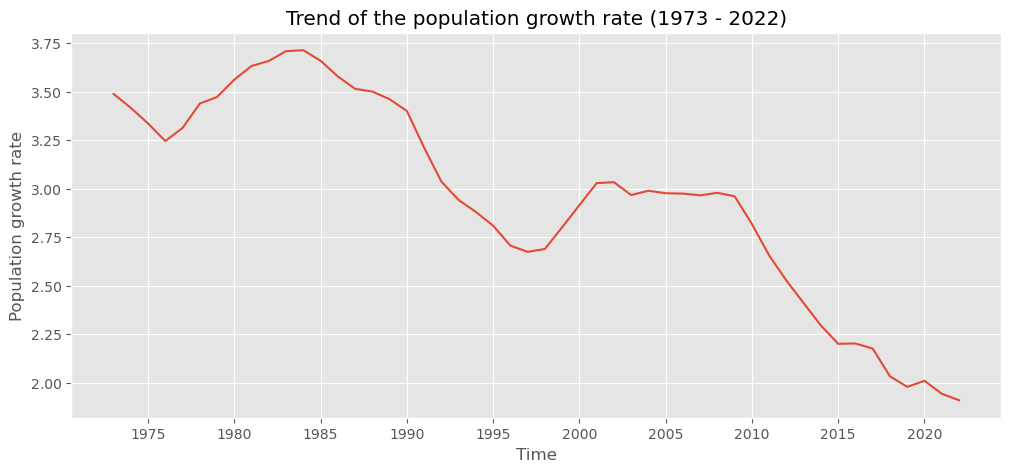

In [12]:
# Line plot showing the trend of population growth rate
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Population growth (annual %) [SP.POP.GROW]', x='Time')
plt.title("Trend of the population growth rate (1973 - 2022)")
plt.ylabel("Population growth rate")
plt.xticks(years)
plt.show()

The trend above can be due to the development of the people in the country. From an era where there was no awareness on birth control and education of the poeple was low to the current state where both aspects have changed by a large margin. Also, emmigaration of citizens now that 'the world is a village'.

### 2.5. Trend of total population

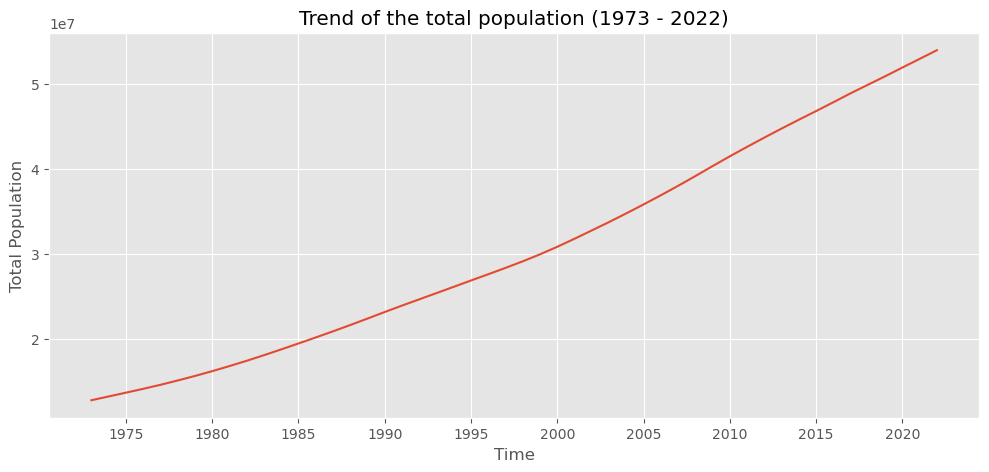

In [13]:
# Line plot showing the trend of real(current) GDP
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Population, total [SP.POP.TOTL]', x='Time')
plt.title("Trend of the total population (1973 - 2022)")
plt.ylabel("Total Population")
plt.xticks(years)
plt.show()

Since there is always a positive population growth rate, the linearity of the total population graph is as expected.

### 2.6. Population Demographic based on Gender

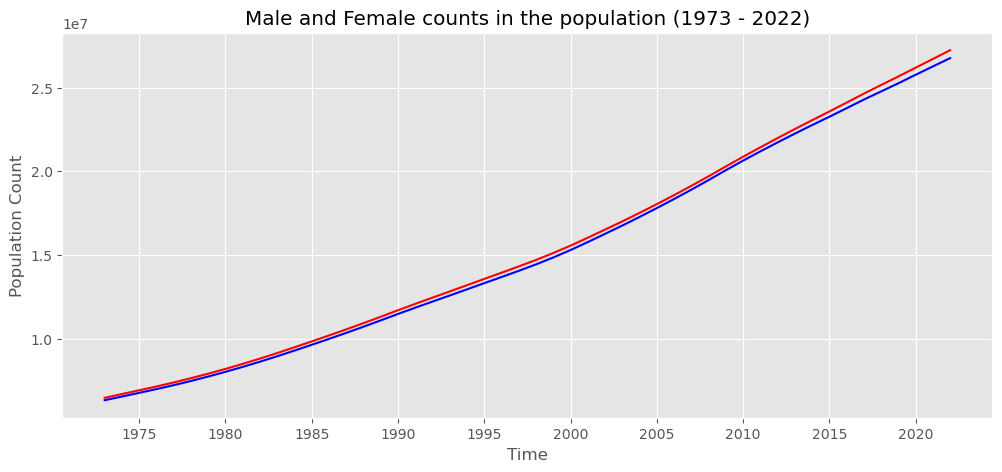

In [14]:
# Line plot showing the trend of population composition (male and female)
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Population, female [SP.POP.TOTL.FE.IN]', x='Time', color='red')
sns.lineplot(data=data, y='Population, male [SP.POP.TOTL.MA.IN]', x='Time', color='blue')
plt.title("Male and Female counts in the population (1973 - 2022)")
plt.ylabel("Population Count")
plt.xticks(years)
plt.show()

There is no significant difference in the number of males and females in the population of Kenya.

### 2.7. Distribution of the population in rural and urban areas

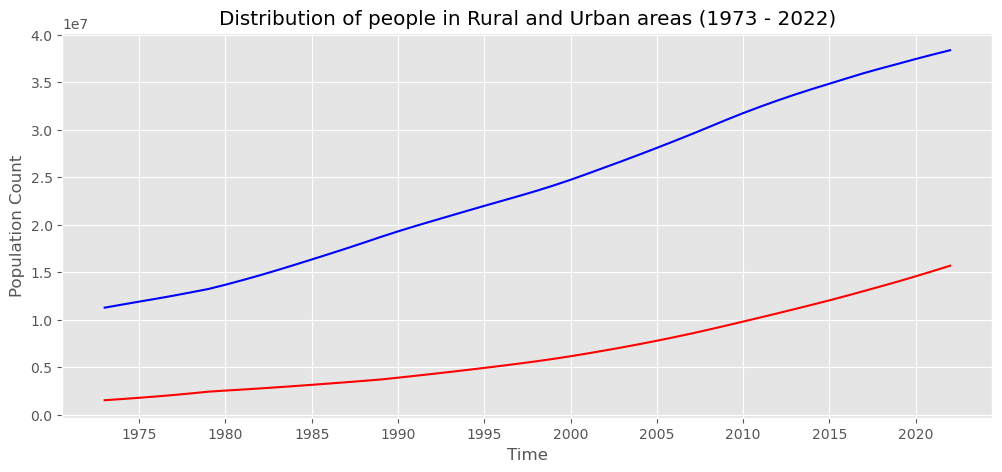

In [15]:
# Line plot showing the distribution of people in rural and urban areas
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, y='Urban population [SP.URB.TOTL]', x='Time', color='red')
sns.lineplot(data=data, y='Rural population [SP.RUR.TOTL]', x='Time', color='blue')
plt.title("Distribution of people in Rural and Urban areas (1973 - 2022)")
plt.ylabel("Population Count")
plt.xticks(years)
plt.show()

Although the ratio of people living in rural vs urban areas decreases over time, the number of people living in rural areas far outnumbers those living in urban areas.

### 2.8. What are the correlations between the variables and what inferences can be made from them?

In [16]:
# Extracting clean data for use in tableau
data.to_csv('../PRODIGY_DS_01/Data/Cleaned_data.csv')

# Dropping time column
data.drop('Time', axis=1, inplace=True)

# Calculating correlations among the variables
df_corr = data.corr()

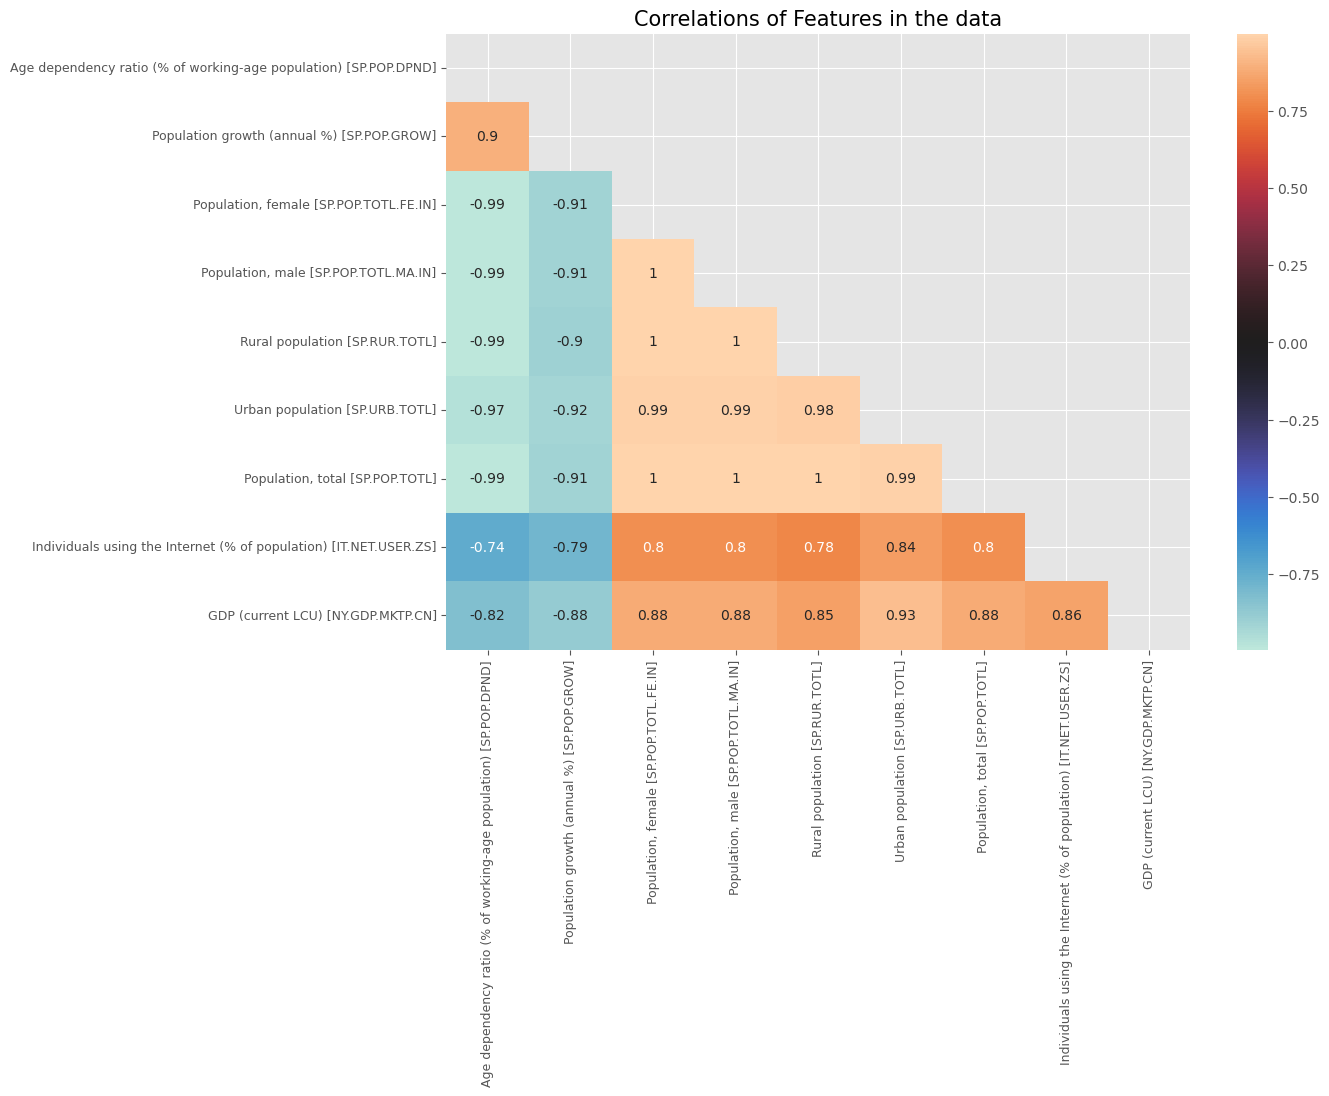

In [17]:
# Heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_corr, mask=np.triu(np.ones_like(df_corr)), cmap='icefire', center=0, annot=True)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlations of Features in the data", fontsize=15)
plt.show()

Considering that the variables in the data are dimensions of population and also GDP is highly dependent on population there are high degrees of correlations between the variables.